<a href="https://colab.research.google.com/github/hardikkamboj/Code/blob/master/Probability/Running_stimulations_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [35]:
# lets first of all create some Classes to make our lives a bit easier
class Coin:
    def __init__(self):
        pass 
    
    def toss(self):
        return np.random.choice(['H','T'])

class Dice:
    def __init__(self):
      pass

    def roll(self):
      return np.random.choice([1,2,3,4,5,6])        

# Problem 1: Two fair coins are tossed together, what is the probablity that they are show up on the same side?

We all have done this problem before. (I assume) <br>
Its most likely that we have solved it using the following steps :-
 - Calculate sub space 
 - Count number of total outcomes 
 - Count number of favourable outcomes
 - calculate (number of fav outcomes / total number of outcomes)

### Lets try this out - 

sub_space = { (Head, Head), (Head, Tail), (Tail,Head), (Tail,Tail) } <br>
total number of outcomes = 4  <br>
favourable number of outcomes = 2 ,ie, {(Head, Head), (Tail,Tail) } <br>
prob = 2 / 4 = 0.5  <br> 

### According to this Probability would be 0.5. 


## Now using stimulations - 

In [3]:
def problem_1(n_itr):
    # select two coins
    coin1 = Coin()
    coin2 = Coin()
    
    num_fav = 0
    
    for itr in range(n_itr):
        result1 = coin1.toss() # toss the first coin
        result2= coin2.toss() # toss the second coin
        
        if result1 == result2: 
            num_fav += 1  # the number of instance when both 
                          # coins showed the same output
            
    return (num_fav / n_itr)        

In [4]:
iterations = 10**np.arange(1,7)
iterations

array([     10,     100,    1000,   10000,  100000, 1000000])

In [10]:
from tqdm import tqdm
score_dict = {}
for curr_itr in tqdm(iterations):
    score_dict[curr_itr] = problem_1(curr_itr)
    

100%|██████████| 6/6 [00:13<00:00,  2.21s/it]

The probability would be  0.49909


In [12]:
print('The probability would be ',list(score_dict.values())[-1])     
# we get a very similar number as from direct caculation

The probability would be  0.49909


Text(0, 0.5, 'Probability')

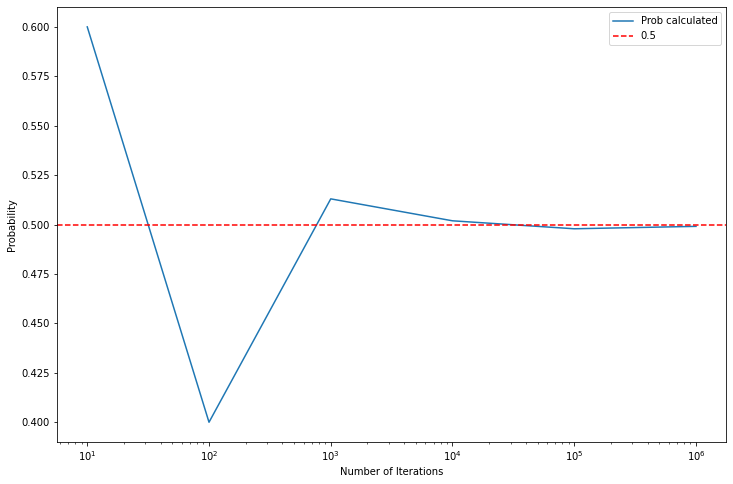

In [17]:
# lets see how this number varies as number of times the stimlation was ran 
plt.figure(figsize = (12,8))
plt.plot(list(score_dict.keys()),list(score_dict.values()),label = 'Prob calculated')
plt.axhline(y = 0.5,linestyle = '--',c = 'red',label = '0.5')
plt.xscale('log')
plt.legend()
plt.xlabel('Number of Iterations')
plt.ylabel('Probability')

We can see from the above graph that the prob of getting the same outcomes on both the coins merges to 0.5 (the desired output) as the number of stimulations is increased. 

# Problem 2: Find the probability of exactly Two Heads when three coins are tossed together. 

In this case we would get a sample size of 8 instances, out of which we would have 2 desired outcomes. Hence the probability in this case would be 3/8 = 0.375

In [29]:
def problem_2(n_itr):
  # select three coins
  coin1 = Coin()
  coin2 = Coin()
  coin3 = Coin()

  num_fav = 0

  for itr in range(n_itr):
    # toss the three coins, and save their outcomes in a list
    results = [coin1.toss(),coin2.toss(),coin3.toss()] 
    if results.count('H') == 2: # checking if it has 2 Heads
      num_fav += 1 

  return num_fav / n_itr    

In [30]:
iterations = 10**np.arange(1,7)
iterations

array([     10,     100,    1000,   10000,  100000, 1000000])

In [31]:
score_dict = {}
for curr_itr in tqdm(iterations):
    # run the stimulation for different number of iterations
    score_dict[curr_itr] = problem_2(curr_itr)
    

100%|██████████| 6/6 [00:20<00:00,  3.38s/it]


In [32]:
print('The probability would be ',list(score_dict.values())[-1])     
# we get a very similar number as from direct caculation

The probability would be  0.374621


Text(0, 0.5, 'Probability')

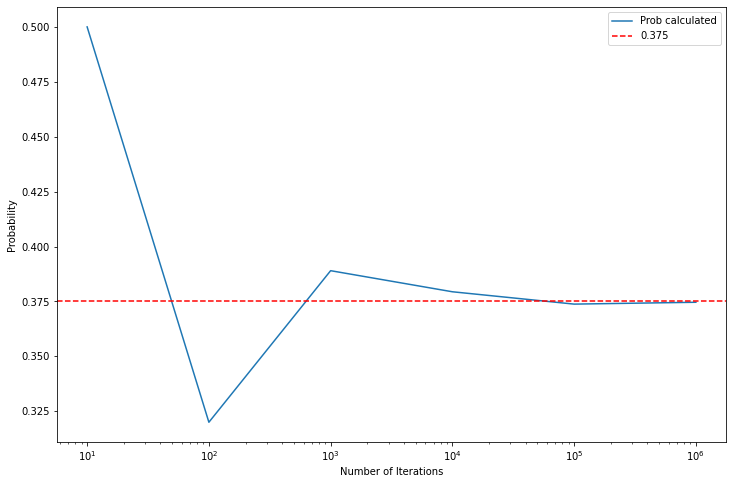

In [34]:
# lets see how this number varies as number of times the stimlation was ran 
plt.figure(figsize = (12,8))
plt.plot(list(score_dict.keys()),list(score_dict.values()),label = 'Prob calculated')
plt.axhline(y = 0.375,linestyle = '--',c = 'red',label = '0.375')
plt.xscale('log')
plt.legend()
plt.xlabel('Number of Iterations')
plt.ylabel('Probability')

Again we observe the similar trend that as the number of iterations increases the probability we get merges with the desired probability.

# Problem 3: Find the probability of rolling doubles on two 6-sided dice numbered from 1 - 6

In this case 
- Sub space (x,y) where both x and y are numbers from 1 to 6. 
- Total number of outcomes - 6 for x and 6 for y = 6*6 = 36 
- Fav number of outcomes = (1,1), (2,2) .... (6,6) = 6 
- Prob of rolling doubles = 6 / 36 = 1 / 6 = 0.1667

## Now lets try stimulations

In [37]:
def problem_3(n_itr):
  # select the dice
  die1 = Dice()
  die2 = Dice()

  num_fav = 0

  for itr in range(n_itr):
      result1 = die1.roll() # roll 
      result2 = die2.roll()  # roll 
      if result1 == result2:
        num_fav += 1 

  return num_fav / n_itr    

In [40]:
score_dict = {}
for curr_itr in tqdm(iterations):
    score_dict[curr_itr] = problem_3(curr_itr)
    

100%|██████████| 6/6 [00:13<00:00,  2.18s/it]


In [41]:
print('The probability would be ',list(score_dict.values())[-1])     
# we get a very similar number as from direct caculation

The probability would be  0.167223


Text(0, 0.5, 'Probability')

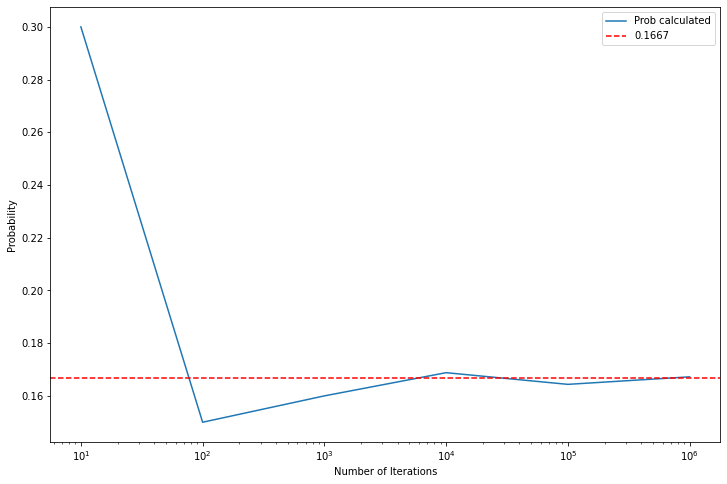

In [42]:
# lets see how this number varies as number of times the stimlation was ran 
plt.figure(figsize = (12,8))
plt.plot(list(score_dict.keys()),list(score_dict.values()),label = 'Prob calculated')
plt.axhline(y = 0.1667,linestyle = '--',c = 'red',label = '0.1667')
plt.xscale('log')
plt.legend()
plt.xlabel('Number of Iterations')
plt.ylabel('Probability')